# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Collection

In [3]:
df = pd.read_csv("./data/Melbourne_housing_FULL.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [13]:
df.shape

(34857, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [12]:
# Take a look to the null values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [20]:
# Number of duplicates
df.duplicated().sum()

1

In [34]:
# get a summary of the categorical variables: number of unique values
cat_var = df.select_dtypes(include=['object']).columns

for i in cat_var:
    print(i, df[i].nunique())

Suburb 351
Address 34009
Type 3
Method 9
SellerG 388
Date 78
CouncilArea 33
Regionname 8


In [121]:
# take a closer look to Suburb
df.Suburb.value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
viewbank             1
Avonsleigh           1
Cranbourne East      1
Kalkallo             1
Olinda               1
Name: Suburb, Length: 351, dtype: int64

**Data Assessment**
- delete rows with price missing values
- fill in missing values for the YearBuilt with "NO_INFORMATION"
- change data type to categorical for the following varibales: Postcode, YearBuilt
- remove variables Date (date sold), Longtitude, Lattitude

## 2. Cleaning

In [99]:
# Create a copy of dataframe
df_clean = df.copy()

Delete rows with missing values for the price and Distance:

In [152]:
df_clean.dropna(subset=['Price', 'Distance'], inplace=True)

In [101]:
# check deletion works
df.shape[0] - df_clean.shape[0]

7610

In [154]:
# How many NaN are still there
df_clean.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Distance             0
Postcode             0
Bedroom2          6440
Bathroom          6446
Car               6823
Landsize          9264
BuildingArea     16590
YearBuilt            0
CouncilArea          2
Regionname           2
Propertycount        2
dtype: int64

Change NaN values from YearBuilt with "NO_INFORMARTION"

In [109]:
df_clean.YearBuilt = df_clean.YearBuilt.replace(np.nan, 'NO_INFORMATION')

In [110]:
# check replacement works
df_clean.YearBuilt.isnull().sum()

0

Change data type to category for Postcode and YearBuilt

In [112]:
# Postcode is an unordered category
df_clean.Postcode = df_clean.Postcode.astype('str')

# YearBuilt is an ordered categorical variable:

# change the category to str so it is compatible with no information 
df_clean.YearBuilt = df_clean.YearBuilt.astype('str')

# create an ordered list of the years:
YearBuilt_order = list(df_clean.YearBuilt.value_counts().sort_index().index)

# create a categorical element:
ordered_YearBuilt = pd.api.types.CategoricalDtype(ordered=True, categories = YearBuilt_order)

# create the category:
df_clean.YearBuilt = df_clean.YearBuilt.astype(ordered_YearBuilt)

In [117]:
df_clean.YearBuilt.dtype

CategoricalDtype(categories=['1196.0', '1820.0', '1830.0', '1850.0', '1854.0', '1856.0',
                  '1857.0', '1860.0', '1862.0', '1863.0',
                  ...
                  '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0',
                  '2017.0', '2018.0', '2019.0', 'NO_INFORMATION'],
                 ordered=True)

Drop columns: Date, Latitude, Longitude

In [119]:
df_clean.drop(columns = ['Longtitude', 'Lattitude', 'Date'], inplace = True)

In [120]:
# check the columns were removed
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')

## 3. Exploratory Analysis

3.1 Univariate Data Analysis

In [155]:
df_clean.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,27246.000000,2.724600e+04,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,27244.000000
mean,2.992292,1.050189e+06,11.280276,3.046237,1.591683,1.715370,593.488933,156.834586,7566.781089
std,0.954813,6.414735e+05,6.787469,0.955122,0.700880,0.994216,3757.266429,449.222791,4492.382418
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,219.000000,100.000000,4294.000000
50%,3.000000,8.700000e+05,10.500000,3.000000,1.000000,2.000000,512.000000,133.000000,6567.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,664.000000,182.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,20.000000,9.000000,18.000000,433014.000000,44515.000000,21650.000000


In [143]:
# get rid of outlyers by keeping 98% of the data
# In order to identify wich variables have outlyers, that I need to remove, check the relative difference between
# the max value and the 98 percentile

num_var = df_clean.select_dtypes(include = ['float', 'int64'])

list_rel_diff = []
for var in num_var:
    percentile_98 = np.percentile(df_clean[var], 98)
    max_var = df_clean[var].max()
    relative_diff = max_var/percentile_98
    list_rel_diff.append(relative_diff)
    
# create a Dataframe with the results
dict_1 = dict(variable = list(num_var))
dict_2 = dict(relative_difference = list_rel_diff)
dict_1.update(dict_2)

In [147]:
num_var.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Propertycount'],
      dtype='object')

In [144]:
list_rel_diff

[3.2, 3.9198667245313734, nan, nan, nan, nan, nan, nan, nan]

In [148]:
df_clean.Distance.max()

48.1

In [153]:
np.percentile(df_clean.Distance, 98)

31.7

In [ ]:
dict_1.update(dict_2)

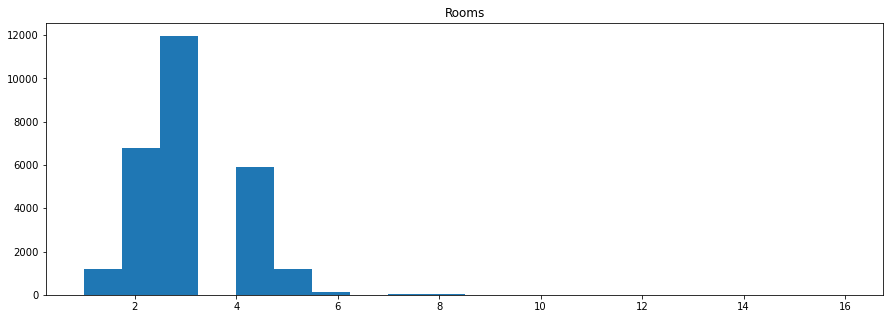

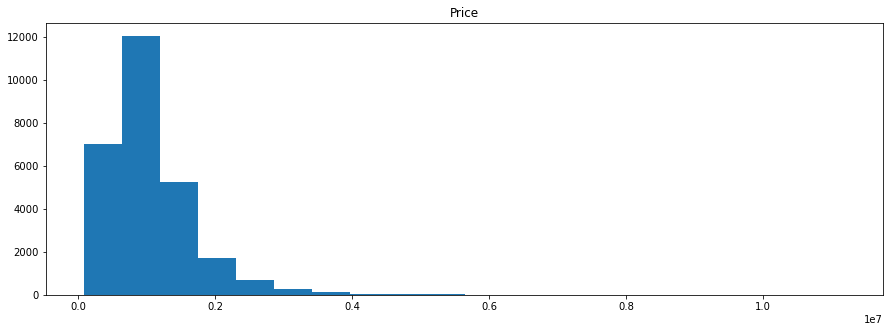

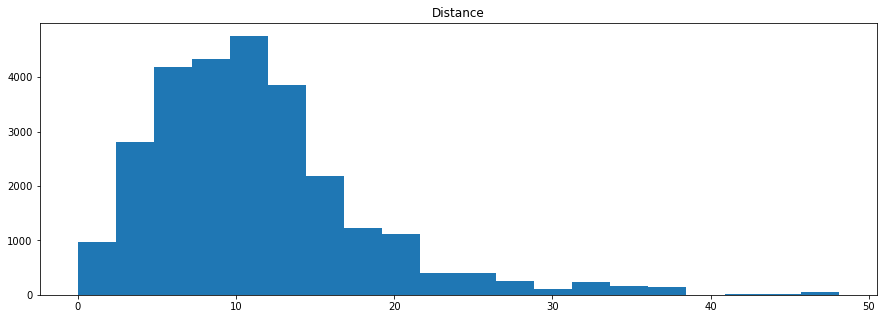

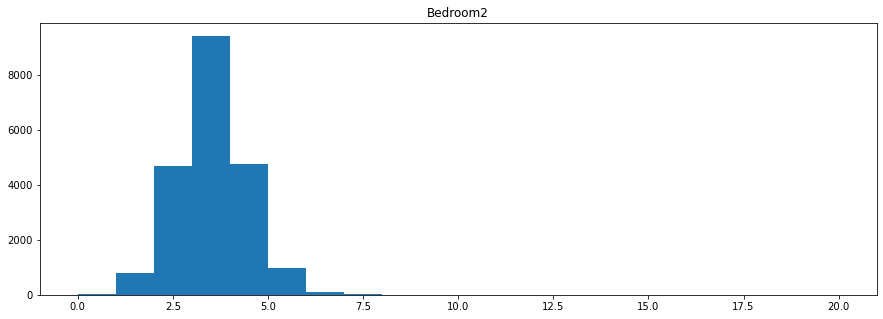

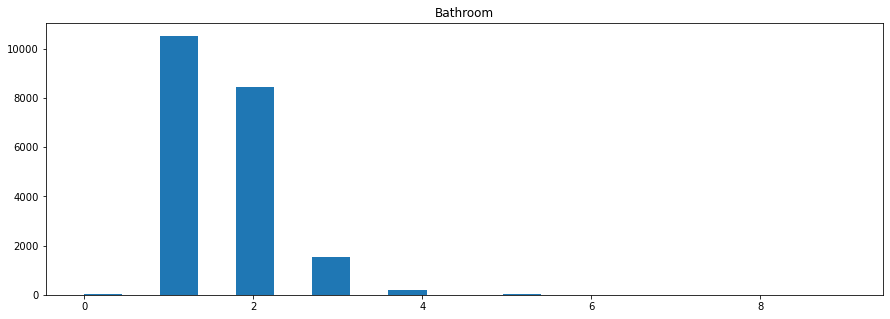

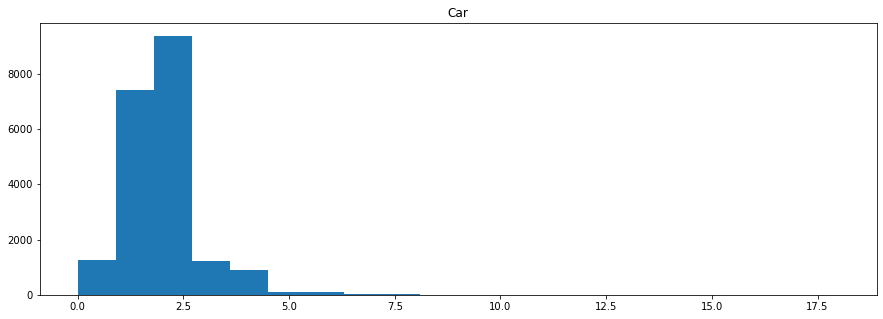

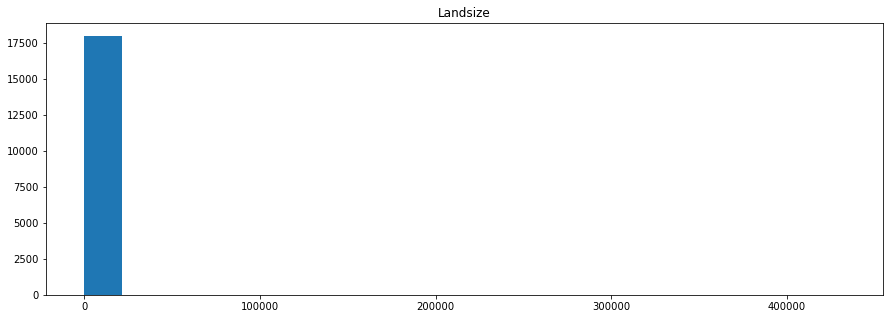

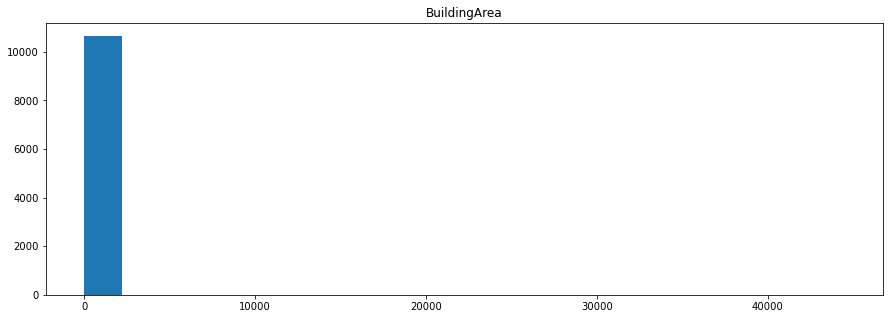

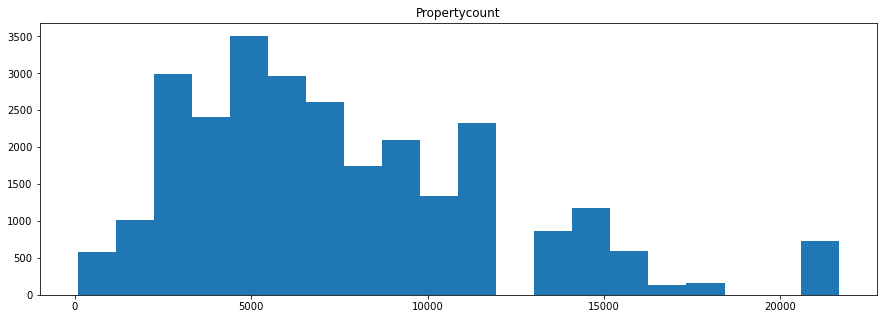

In [127]:
# Check the distribution of all the numerical values:

# set a list with all numerical values:
num_var = df_clean.select_dtypes(include = ['float', 'int64'])

for var in num_var:
    plt.figure(figsize=[15,5])
    plt.hist(data = df_clean, x=var, bins = 20)
    plt.title(var);

<AxesSubplot:xlabel='Landsize'>

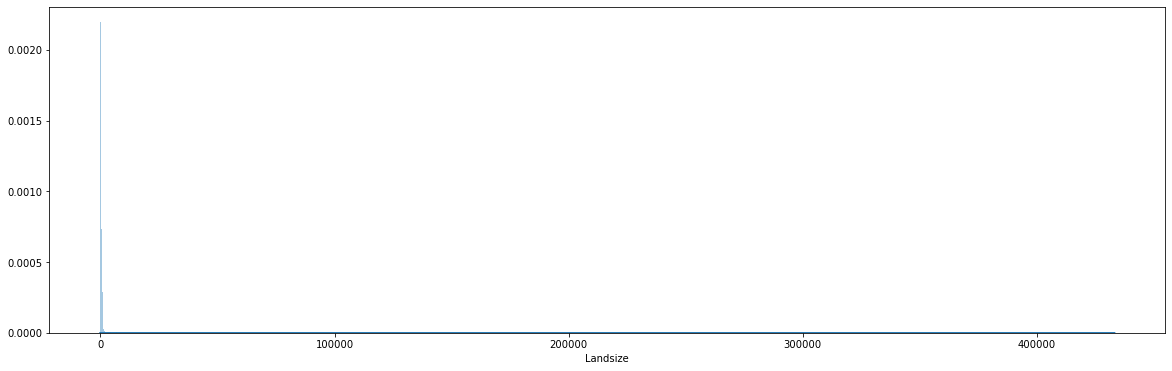

In [128]:
bin_edges = np.arange(0, df_clean['Landsize'].max()+50, 50)

plt.figure(figsize=[20,6])
sns.distplot(df_clean['Landsize'], bins=bin_edges)

In [129]:
df_clean.Landsize.value_counts()

0.0        1942
650.0       161
697.0        97
585.0        74
534.0        70
           ... 
42800.0       1
1468.0        1
1276.0        1
2422.0        1
2581.0        1
Name: Landsize, Length: 1557, dtype: int64

In [134]:
test = df_clean[df_clean.Landsize != 0]

<AxesSubplot:xlabel='Landsize'>

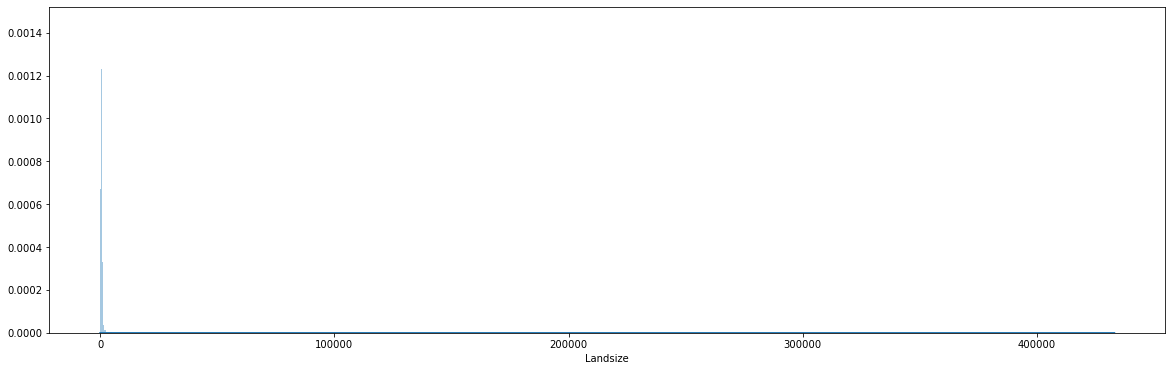

In [136]:
bin_edges = np.arange(0, df_clean['Landsize'].max()+200, 200)

plt.figure(figsize=[20,6])
sns.distplot(test['Landsize'], bins=bin_edges)

In [124]:
num_var

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,4019.0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,4019.0
...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,6543.0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,6543.0
34854,2,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,6543.0
34855,3,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN,6543.0


## 4. Model Building

## 5. Iterating